In [82]:
# 필요한 라이브러리 & 모듈 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# 데이터 불러오기
data = pd.read_csv('C:\Projects\data.csv', encoding = 'euc-kr')

# 상위 5행 확인 : 데이터 확인 
data.head()


C:\Users\kygam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,cloud,min_cloud_hei,rain,temp,visiblity,wind_dire,wind_spd,class
0,6,15,0,24,600,32,5,0
1,0,0,0,8.5,800,4,5,0
2,2,35,0,12.4,900,35,7,0
3,0,0,0,9.6,1000,35,6,0
4,0,0,0,11.5,1000,28,8,0


In [83]:
# 데이터 정보 확인, 누락 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74241 entries, 0 to 74240
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cloud          74241 non-null  int64 
 1   min_cloud_hei  74241 non-null  int64 
 2   rain           74241 non-null  int64 
 3   temp           74241 non-null  object
 4   visiblity      74241 non-null  object
 5   wind_dire      74241 non-null  int64 
 6   wind_spd       74241 non-null  int64 
 7   class          74241 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 4.5+ MB


In [84]:
# 컬럼 타입 변경 : 문자형 -> 숫자형 
# error 옵션 : 숫자로 변경할 수 없는 데이터면 NaN 처리
# NaN 처리된 데이터는 0으로 바뀜
data = data.apply(pd.to_numeric, errors = 'coerce').fillna(0)

# 바뀐 데이터 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74241 entries, 0 to 74240
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cloud          74241 non-null  int64  
 1   min_cloud_hei  74241 non-null  int64  
 2   rain           74241 non-null  int64  
 3   temp           74241 non-null  float64
 4   visiblity      74241 non-null  float64
 5   wind_dire      74241 non-null  int64  
 6   wind_spd       74241 non-null  int64  
 7   class          74241 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 4.5 MB


In [85]:
# 데이터 요약, 관련 통계
data.describe()

,cloud,min_cloud_hei,rain,temp,visiblity,wind_dire,wind_spd,class
count,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000
mean,4.853369,50.222236,0.164895,17.492967,934.055037,18.999246,8.313331,0.009388
std,2.778913,62.860158,1.225335,7.946439,166.127441,12.072720,5.194064,0.096438
min,0.000000,0.000000,0.000000,-2.900000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,15.000000,0.000000,11.300000,1000.000000,7.000000,5.000000,0.000000
50%,6.000000,30.000000,0.000000,17.900000,1000.000000,21.000000,7.000000,0.000000
75%,7.000000,40.000000,0.000000,24.000000,1000.000000,31.000000,11.000000,0.000000
max,8.000000,240.000000,57.000000,35.800000,1000.000000,36.000000,43.000000,1.000000


In [86]:
# pandas 데이터 프레임 객체 -> numpy 배열 객체
# 학습 데이터 
train_data = data[['cloud','min_cloud_hei','rain', 'temp', 'visiblity','wind_dire','wind_spd']].to_numpy()
# 타겟 데이터 
target=data['class'].to_numpy()

# train_test_split : 학습 / 테스트 데이터 셋 분리 모듈
# 테스트 셋 사이즈 = 30%
train_input, test_input, train_target, test_target = train_test_split(
train_data, target, test_size = 0.25)

# 데이터 셋 분리 확인
print(train_input.shape, test_input.shape)

(55680, 7) (18561, 7)


In [87]:
# 스케일링 
ss = StandardScaler()

# train 데이터 조정
ss.fit(train_input)

# train / test 데이터 스케일 조정, 표준 점수로 변환
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [88]:
# 로지스틱 회귀
lr = LogisticRegression()

# 학습
lr.fit(train_scaled, train_target)

# 정확도 확인
# 학습 데이터 정확도
print(f"[Logistic Regression] Train_data Accuracy : {lr.score(train_scaled, train_target)}")
# 테스트 데이터 정확도
print(f"[Logistic Regression] Test_data Accuracy : {lr.score(test_scaled, test_target)}")
# 계수, y절편
print(lr.coef_, lr.intercept_)

# 테스트(결항)
test = [[8 ,15, 4, 20.5, 600, 3, 18]]
y_pred = lr.predict(test)
y_true = 1

print(f"예측값 : {y_pred} ")
print(f"실제값 : {y_true}")

[Logistic Regression] Train_data Accuracy : 0.9905172413793103
[Logistic Regression] Test_data Accuracy : 0.9915952804267012
[[ 0.12896291  0.28852679  0.05469282  0.10486827 -0.41416364  0.52216369
   0.70148239]] [-5.17270669]
예측값 : [0] 
실제값 : 1


In [72]:
# decision tree 
dt = DecisionTreeClassifier()
# 학습
dt.fit(train_scaled, train_target)
# 정확도 확인 
print(f"[Decision Tree] Train_data Accuracy : {dt.score(train_scaled, train_target)}")
print(f"[Decision Tree] Test_data Accuracy : {dt.score(test_scaled, test_target)}")

y_pred = dt.predict([test_scaled[-1]])
y_true = test_target[-1]

print(f"예측값 : {y_pred} ")
print(f"실제값 : {y_true}")
# plot 그리기 사이즈 : (10,7)
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()


[Decision Tree] Train_data Accuracy : 0.9969288793103448
[Decision Tree] Test_data Accuracy : 0.992672808577124
예측값 : [0] 
실제값 : 0


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002040BE2CA60> (for post_execute):


KeyboardInterrupt: 

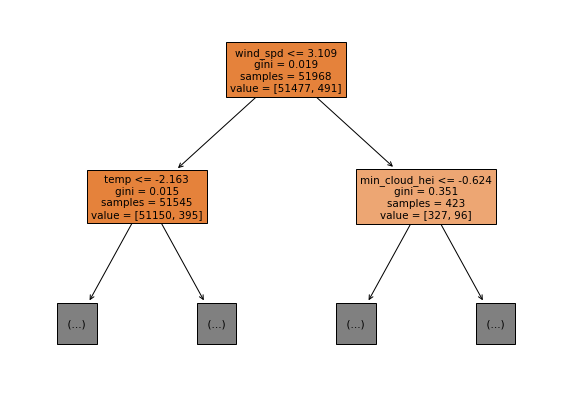

In [11]:
# plot 그리기 
plt.figure(figsize=(10,7))
# 최대 깊이 : 1, 색 칠하기 : true, feature_names : feature 이름 전달
plot_tree(dt, max_depth=1, filled=True, feature_names=['cloud','min_cloud_hei','rain', 'temp', 'visiblity','wind_dire','wind_spd'])
plt.show()



[Decision Tree] Train_data Accuracy : 0.991090671182266
[Decision Tree] Test_data Accuracy : 0.9911103129349437


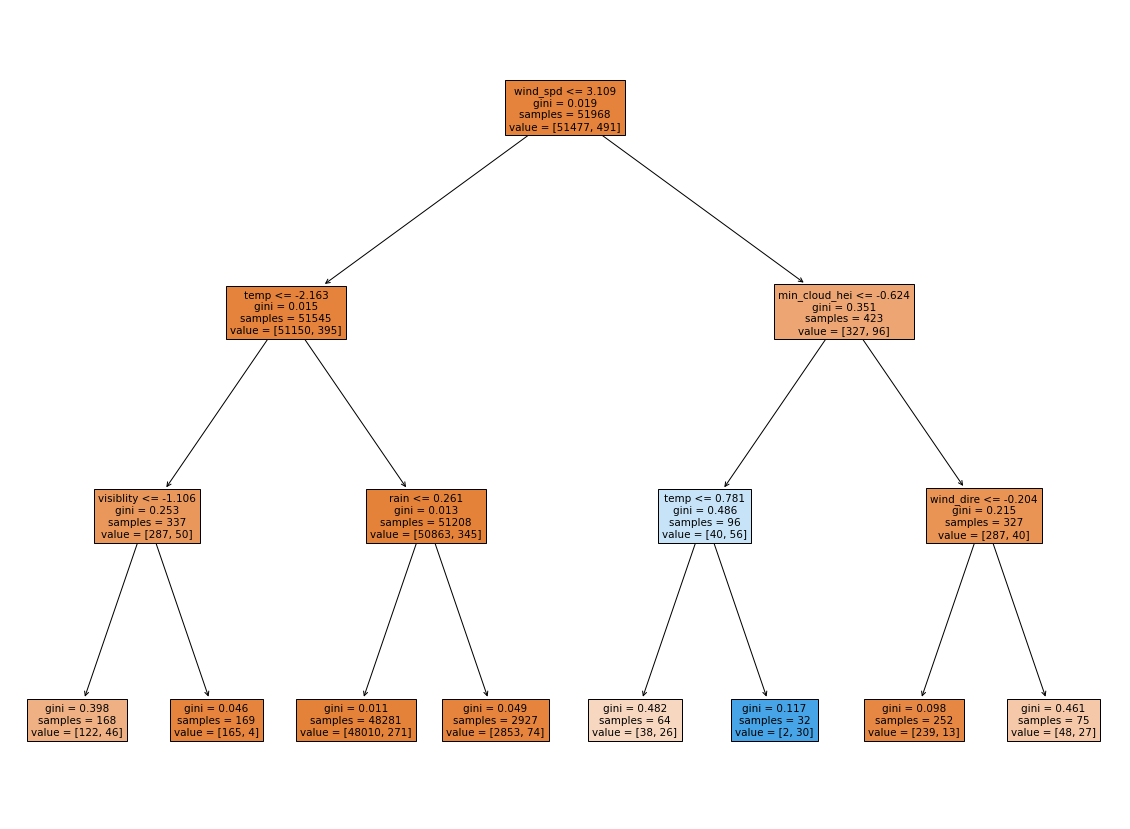

[0.         0.26061038 0.01764065 0.21044942 0.08710226 0.09083903
 0.33335826]


In [12]:
# 깊이 3으로 디시전트리 만들기
dt = DecisionTreeClassifier(max_depth=3)
#학습
dt.fit(train_scaled, train_target)
# 정확도 확인
print(f"[Decision Tree] Train_data Accuracy : {dt.score(train_scaled, train_target)}")
print(f"[Decision Tree] Test_data Accuracy : {dt.score(test_scaled, test_target)}")

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['cloud','min_cloud_hei','rain', 'temp', 'visiblity','wind_dire','wind_spd'])
plt.show()

# 변수별 중요도 확인
print(dt.feature_importances_)